# A equação de Black-Scholes-Merton: soluções, gráficos e gregas

## Uma discussão da mais famosa equação para precificação de opções, a equação de Black-Scholes-Merton. Mostraremos suas bases matemáticas, soluções, gráficos e as gregas, recorrendo sempre ao Python quando necessário.

### 1) A equação de Black-Scholes-Merton e sua solução

A chamada equação de Black-Scholes-Merton equation é uma equação diferencial parcial para uma opção Europeia sobre uma ação. O artigo original que apresentou a equação pela primeira vez foi publicado por Black and Scholes [1] e essa é a razão pela qual a maioria das pessoas a chamam de equação de Black-Scholes. Mas apenas após as contribuições de Merton [2,3] foi que o modelo alcançou sua grande importância tanto teórica quanto prática entre economistas, matemáticos, pesquisadores, investidores e traders. É por essa razão que aqui nós a chamaremos de modelo de Black-Scholes-Merton (BSM, para simplificar) atribuindo crédito à grande contribuição de Robert Merton. 

Esse modelo é uma forma de se calcular o preço de opção Europeia sobre uma ação. Ele também pode ser estendido para se calcular futuros e swaps sobre outros tipos de ativos, embora o seu uso mais comum é para opções Europeias sobre ações. Basearemos a análise desse texto apenas no cálculo do preço justo por uma opção de compra Europeia sobre uma ação e mostraremos depois como aplicar esse mesmo modelo em outros contextos. Esse modelo possui várias hipóteses para sua validade e considerações sobre a ação subjacente à opção, bem como considerações sobre o mercado em si, quais sejam:

a) Existe um ativo livre de risco que pode ser tomado a uma taxa de juros $r$ conhecida e constante ao longo do tempo.

b) A opção é de tipo Europeia, só pode ser exercida na data de vencimento.

c) O preço da ação segue um movimento browniano geométrico [4] (aqui não importa muito o que isso significa, deixo apenas como referência para leitura futura para o leitor mais interessado).

d) A ação subjacente não paga dividendos.

e) Não há custos de transação entre se comprar ou vender a ação ou a opção.

f) É possível tomar empréstimo de qualquer quantia à taxa de juros do ativo livre de risco.

g) É possível comprar ou vender qualquer quantidade da ação ou da opção.

h) O mercado é eficiente, ou seja, não há oportunidades de arbitragem.

Note que algumas hipóteses são bastante fortes porém, por hora, não iremos nos ater a elas. Futuramente nesse texto retornaremos a esse tema, dedicando algumas consideraçoes sobre as hipóteses, sua veracidade e aplicabilidade prática. Com estas hipóteses em mãos precisamos apenas de mais algumas definições para finalmente apresentar a equação. Seja 
$V$ o preço da opção, $S$ o preço da ação, $K$ o preço de exercício da opção, $r$ a taxa de juros livre de risco e $\sigma^2$ a volatilidade da ação subjacente. A equação de Black-Scholes-Merton é a seguinte equação diferencial parcial (derivada explicitamente em [1]):

\begin{equation} \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2 }  + rS\frac{\partial V}{\partial S}  - rV = 0  \label{eq:BSM} \tag{1} \end{equation}

Não comentamos anteriormente, mas a volatilidade é uma medida do risco do ativo subjacente. Esse ativo pode ser qualquer tipo de security, mas como comentamos no início iremos considerar como sendo uma ação, por simplicidade. Veremos mais para frente como encontrar esse parâmetro futuramente.

A equação BSM, \ref{eq:BSM}, é uma equação diferencial parcial (EDP), que relaciona a função $V(S,t)$ e suas derivadas. A solução dessa EDP fornece a função $V(S,t)$ que calcula o preço de uma opção sob uma ação subjacente de preço $S$ no tempo $t$. A obtenção dessa solução está explicitamente escrita no artigo original de Black [1] e também pode ser encontrada no livro-texto de John Hull [4]. Por simplicidade não derivaremos a solução aqui, atendo-nos apenas ao seu resultado:

\begin{equation}  V_C(S,t) = SN(d_1) - Ke^{-r(T-t)}N(d_2), \label{eq:solcall} \tag{2}  \end{equation}

\noindent chamamos de $V_C$ por se tratar do preço de uma opção de compra (call option) Europeia. Aqui, $T$ é o prazo de vencimento da opção e $t$ é o tempo atual para o qual queremos calcular o preço da opção de compra. $K$ é o preço de exercício, $S$ o preço da ação no tempo $t$. $N(x)$ representa a distribuição acumulada normal padrão, um recurso matemático que aparece na solução da equação BSM. Essa distribuição representa qual é a probabilidade de se encontrar uma quantidade $x$ para uma variável aleatória $X$ que segue uma distribuição normal padrão. Para nós importa que $N(d_1)$ e $N(d_2)$ são números e satisfazem $0 < N(d_1) < 1$ e $0 < N(d_2) < 1$. Por fim nos resta apresenta quem são os parâmetros $d_1$ e $d_2$:

\begin{equation} d_1 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r + \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}, \qquad d_2 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}. \label{eq:d1d2} \tag{3} \end{equation}

Esses parâmetros $d_1$ e $d_2$ são escritos dessa forma apenas para simplificar a notação. A expressão para o preço de uma opção de venda (put option) sob uma ação é ligeiramente diferente é dado por:

\begin{equation} V_E(S,t) = Ke^{-r(T-t)}N(-d_2) - SN(-d_1), \label{eq:solput} \tag{4} \end{equation}

Portanto, com essas equações em mãos, temos um pequeno roteiro para calcular a solução da equação BSM para o preço de uma opção Europeia tanto de venda quanto de compra:

I) Calcular os parâmetros $d_1$ e $d_2$ usando equação \ref{eq:d1d2};

II) Calcular N(d_1) e N(d_2) usando a distribuição acumulada normal padrão;

III) Calcular o valor da opção de compra ou de venda usando equações \ref{eq:solcall} ou \ref{eq:solput}.

A seguir apresentaremos um curto exemplo que calcula o preço da opção de compra explicitamente usando Python e suas bibliotecas.

In [1]:
#Importar as bibliotecas que serão utilizadas
import math
from scipy.stats import norm

#Calcular parâmetros d1 e d2 com os valores de S, K, r, sigma, T e t dados
S = 23.43 #Preço da ação subjacente
K = 16.21 #Preço de exercício
r = 0.035 #Taxa de juros livre de risco
sigma = 0.4  #Volatilidade da ação subjacente
T = 17/251 #Dia de vencimento, contado como uma fração de dias úteis, são 251 dias úteis num ano
t = 1/251 #Dia onde a opção será calculada

d1 = (math.log(S/K) + (r+sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
d2 = (math.log(S/K) + (r-sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))

Vc = S*norm.cdf(d1) - K*math.exp(-r*(T-t))*norm.cdf(d2)
Ve = K*math.exp(-r*(T-t))*norm.cdf(-d2) - S*norm.cdf(-d1)

print('O preço de uma opção de compra de preço de exercício', K, 'com preço da ação subjacente', S,'será:', Vc)
print('O preço de uma opção de venda de preço de exercício', K, 'com preço da ação subjacente', S,'será:', Ve)

O preço de uma opção de compra de preço de exercício 16.21 com preço da ação subjacente 23.43 será: 7.256183106052575
O preço de uma opção de venda de preço de exercício 16.21 com preço da ação subjacente 23.43 será: 5.768326232694597e-05


## 2) Gráficos do preço da opção de compra

Uma ótima forma de enxergar o comportamento do preço de uma opção Europeia de compra em função dos parâmetros $S$, $K$, $\sigma$, $r$ e $T-t$. Para realizar esse teste consideramos alguns dados genéricos (com apelo didático) que são $S = 50$, $K = 50$, $\sigma = 0.3$, $r = 0.05$ e $T - t = 1$. Para apresentar esses gráficos, mantemos todas menos uma dessas variáveis fixas e a que sobra deixamos em aberto para plotarmos o gráfico. Por exemplo, fixamos $K$, $\sigma$, $r$ e $T - t$ e variamos $S$. O gráfico a seguir apresenta o comportamento da opção de compra em função de $S$, o preço da ação subjacente

![varyingS.jpg](varyingS.jpg)

Note que $V_c$, o preço da opção de compra, é nulo para $S < 35$. Isso é o comportamento esperado pois $S$ é bem menor do que $K$, ou seja, é bastante improvável que uma opção de compra de preço de exercício bem mais alta que a ação subjacente seja negociada. A partir desse ponto o preço da opção começa a crescer em função de $S$. Isso significa que se o preço da ação subjacente aumentar, o preço de uma opção de compra também irá aumentar.

Agora, para $S$, $\sigma$, $r$ e $T-t$ fixos e variamos $K$ para plotarmos o gráfico do preço da opção de compra em função do preço de exercício

![varyingK.jpg](varyingK.jpg)

Note curiosamente que o comportamento é de certa forma inverso ao do gráfico anterior: o preço da opção de compra diminui à medida que o preço de exercício aumenta. Isso é interessante de se pensar que, novamente, o preço da opção de compra terá que ser bem alto para um preço de exercício muito baixo. E, por outro lado, para um preço de exercício muito alto, o preço da opção de compra será nulo. Este úiltimo fato acontece pois é bastante improvável que uma opção de compra de preço de exercício muito alto seja negociada.

Agora, para $S$, $K$, $r$ e $T-t$ fixos e variando $\sigma$ plotamos o gráfico do preço da opção de compra em função da volatilidade

![varyingSigma.jpg](varyingSigma.jpg)

O comportamento desse gráfico é semelhante ao primeiro, porém com um detalhe muito importante: o preço da opção de compra cresce muito rápido quando aumentamos a volatilidade. Isso porque um ativo subjacente mais volátil tem mais probabilidade de apresentar valores extremos, portanto variações na mesma afetam fortemente o preço da opção de compra.

Agora, para $S$, $K$, $\sigma$ e $T-t$ fixos e variando $r$ plotamos o gráfico do preço da opção de compra em função da taxa de juros livre de risco

![varyingR.jpg](varyingR.jpg)

Novamente, o preço da opção de compra cresce à medida que a taxa de juros livre de risco também cresce. Porém, há um detalhe importante: esse comportamento é aproximadamente linear, o que é bem diferente dos comportamentos anteriores. Uma variação em $r$ implicará numa variação proporcional no preço da opção de compra, seguindo uma relação linear semelhante a do gráfico. Por outro lado, nos gráficos anteriores, essa variação não é linear e pode crescer bem rápido como é o caso do gráfico do preço da opção de compra em função da volatilidade.

Por fim $S$, $K$, $\sigma$ e $r$ fixos e variando $T-t$ plotamos o gráfico do preço da opção de compra em função do tempo até o vencimento da opção

![varyingT.jpg](varyingT.jpg)

Esse também é um comportamento que é interessante de se notar. À medida que o tempo passa (imagine que você está lendo o gráfico da direita pra esquerda) e a opção se aproxima do período de vencimento, seu valor diminui até chegar a zero (dizemos que a opção "virou pó"). Isso é interesssante de perceber numa perspectiva de negócio: quanto mais próximo do vencimento, mais provável dessa opção ser negociada ou exercida, reduzindo seu preço em relação a um tempo mais longo em relação a data de vencimento. Opções que ainda estão longe da data de vencimento tendem a ter preços mais elevados.

## 3) Análise dos elementos da equação de Black-Scholes-Merton, sua solução e seus gráficos

Na seção anterior plotamos diversos gráficos sobre o comportamento da solção da equação BSM em função de cada um dos seus parâmetros: o preço da ação subjacente ($S$), o preço de exercício ($K$), a volatilidade ($\sigma$), a taxa de juros livre de risco ($r$) e o tempo até a data de vencimento ($T-t$). Mas em momento nenhum mencionamos explicitamente o que tais coisas significam em detalhes e isso foi feito de propósito. Primeiro queríamos trazer uma intuição de um ponto de vista matemático, apresentando como o preço da opção de compra varia em função desses parâmetros. Esse entendimento de um ponto de vista visual é muito importante na análise de investimentos e, em geral, na análise de séries de dados. Porém, agora, faz-se necessário uma análise mais detalhada sobre o que significam cada um desses parâmetros e como o preço da opção de compra, no modelo de BSM, se comporta em função desses parâmetros.

A primeira variável que queremos analisar é o preço do ativo subjacente, $S$. Imagine que queremos negociar uma opção de compra da Petrobrás. Portanto a ação subjacente serão ações de Petrobrás (por exemplo, PETR4) e $S$ será o preço dessa ação. Tão simples quanto isso. Variando-se o preço dessa ação, varia-se o preço da opção também (seguindo o comportamento da seção anterior). O preço de exercício $K$ é uma característica da opção, elas são lançadas com preço de exercício pré-estabelecido e que geralmente é próximo do preço do ativo subjacente. Consultando o site https://br.advfn.com/investimentos/opcoes/call-mais-negociada-petrobras sobre quais são as opções de compra mais negociadas sobre PETR4 veremos que há um bom número de opções com preços de exercício variados (a coluna strike da tabela). 

O tempo até o vencimento, $T-t$, é uma medida do tempo que falta para o vencimento. No caso das opções negociadas no mercado brasileiro, são contadas em dias úteis e com vencimento mensal. Podemos entender as variáveis $T$ e $t$ de duas formas diferentes. A primeira, é conhecer quem são $T$ e $t$ individualmente. $T$, portanto, é a data exata quando a opção vence e $t$ o tempo atual no qual queremos calcular o preço da mesma. Já a diferença $T-t$ é o tempo que falta para a opção vencer. É bastante comum calcular preço de opções em função de $T-t$, pois essa diferença é geralmente a variável de interesse prático. Outra coisa importante é o termo "medida" de tempo, que usei anteriormente. Não podemos inserir $T-t$ em dias úteis, mas em uma fração de dias em relação a um ano de negócio. Em outras palavras, e exemplificando, considere uma opção que vence daqui a 15 dias úteis e um ano de negócio possui 252 dias úteis. Portanto, nesse caso, $T-t = 15/252 = 0.0595$, o tempo que falta para a opção vencer contado a partir de hoje. Se quisermos calcular o preço que essa opção poderá ter no dia de amanhã, teremos então $T - t = 14/252 = 0.0555$. É importante não esquecermos dessa fração de dias em relação a um ano de negócio, do contrário o cálculo para o preço da opção de compra não funcionará.

Resta-nos analisar dois parâmetros: $r$ e $\sigma$. Falaremos um pouco sobre $r$ agora e dedicaremos a seção seguinte inteira para estudarmos a volatilidade, $\sigma$. $r$, conforme mencionamos, é a taxa de juros livre de risco. É uma taxa de juros paga por um ativo de risco nulo e é assumida constante. Geralmente essa taxa é aquela paga por ativos de risco muito baixo (afinal, não existem ativos de risco nulo) como, por exemplo, os títulos públicos atrelados à taxa Selic ou títulos do governo americano (para o caso de precificarmos opções negociadas nos EUA). Essa taxa de juros livre de risco também pode ser atrelada à CDI, à taxa básica de juros e várias outras opções de taxas que estão ligadas a ativos de baixo risco e com taxa de juros aproximadamente constantes. Para simplificar as coisas, para o mercado brasileiro, utilizaremos a taxa básica de juros brasileira (a taxa Selic) que hoje dia 08 de maio de 2021 está valendo 3.5% a.a. Para se precificar opções em outros mercados (Estados Unidos, China etc) é preciso estabelecer a taxa de juros livre de risco desses mercados. No caso dos Estados Unidos, geralmente usa-se a taxa paga pelos títulos públicos americanos de 10 anos, a qual hoje dia 08 de maio de 2021 vale 1.58% a.a.

## 4) Volatilidade: o que é e como estimá-la

A volatilidade $\sigma$ está associada ao ativo subjacente e não é diretamente ligada a opção em si. Grosso modo, a volatilidade é uma medida do risco associado ao ativo subjacente. Quanto mais volátil um ativo (maior o valor de $\sigma$) mais provável que esse ativo experimente preços extremos e, portanto, mais arriscado ele será. Imagine um ativo que tem 50% de chance de dobrar de valor e, igualmente, 50% chande de perder valor à metade. E, para fins de comparação, imagine um segundo ativo cuja chance de dobrar ou perder valor à metade é de 3%. Certamente o primeiro desses ativos é muito mais arriscado que o primeiro. A volatilidade é uma medida desse risco. E esse conceito de volatilidade (do ativo subjacente, reiterando) é essencial para a precificação de opções (tanto no modelo BSM que tratamos nesse texto como em modelos mais complexos).

Mas, a pergunta que pode surgir é: como estimar a volatilidade? Essa é, digamos, uma das perguntas mais importantes em precificação de opções. Antes de prosseguir sugerimos ao leitor retornar ao código Python da seção 1 e testá-lo para diferentes valores de $\sigma$ e perceber como o preço da opção pode variar bastante ao se variar a volatilidade. Daí reside a importância de se saber estimar a volatilidade. Nesse texto apresentaremos duas formas de estimar a volatilidade: o cálculo usando dados históricos e a volatilidade implícita.

### 4.1) Volatilidade a partir dos dados históricos

A ideia desse trecho é bastante baseada no método de John Hull, proposto na referência [4]. Apresentaremos os métodos para alcançar esse resultado agora e depois um código Python capaz de fazer isso a partir de dados históricos. 

Primeiramente precisaremos das cotações históricas do ativo subjacente de interesse e, para esse exemplo, usaremos a ação PETR4. Precisaremos das cotações da ação PETR4 ao longo do tempo. O intervalo de tempo escolhido pode ser de dias úteis, horas, minutos, semanas, meses, anos etc. O caso mais comum é o cálculo da volatilidade diária com dados anuais. Portanto usaremos os dados de 2020 para as cotações de fechamento da ação PETR4 e cada cotação dessa chamaremos de $S_i$, o preço $S$ no dia $i$ (seguindo a notação da referência [4]). Com a cotação definimos a diferença logarítmica entre os dados (o retorno da ação, termo muito usados em finanças quantitativas):

\begin{equation} u_i = \ln{S_i} - \ln{S_{i-1}}, \tag{5} \end{equation}

ou seja, é a diferença do logaritmo da cotação de hoje com o logaritmo da cotação de ontem. Essa variável é chamada de retorno da ação. Para um maior esclarecimento do por que se escolher essa forma sugerimos [5]. Supomos que temos um conjunto de $m$ retornos, logo a medida de volatilidade a partir dos dados históricos é dada pelo desvio padrão dessa amostra:

\begin{equation} \sigma_n = \sqrt{\frac{1}{m-1}\sum_{i=1}^m\left(u_{i-1}-\bar{u}\right)^2}, \tag{6} \end{equation}

em que $\bar{u}$ é a média dos retornos

\begin{equation} \bar{u} = \frac{1}{m}\sum_{i=1}^mu_{i}. \tag{7} \end{equation}

Claro que essa é uma abordagem até que relativamente simples e que, apesar disso, fornece alguns bons resultados. Existem outras formas mais sofisticadas de se estimar a volatilidade, como por exemplo usando métodos de médias móveis. Para mais detalhes desses métodos mais sofisticados sugerimos [4] e também as referências sugeridas lá dentro. 

Para aplicar esse método com dados reais e ter uma estimativa mais realista da volatilidade vamos aplicá-lo para estimar a volatilidade histórica (o nome dado à volatilidade calculada a partir dos dados histórico) das ações de Petrobrás, PETR4. Primeiro precisamos conseguir os dados históricos de cotações da ação, que podem ser adquiridos através do Yahoo Finance: https://finance.yahoo.com/quote/PETR4.SA/history?period1=1577836800&period2=1609372800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true e escolhemos o período de 01/01/2020 a 31/12/2020, o ano passado inteiro. Os arquivos são exportados para um CSV. É a partir deles que faremos o cálculo conforme mostramos nos algoritmos Python a seguir.

0      29.698208
1      29.456367
2      29.804619
3      29.688534
4      29.504732
         ...    
243    26.391766
244    27.039951
245    27.262461
246    27.349531
247    27.417252
Name: Preço ajustado, Length: 248, dtype: float64


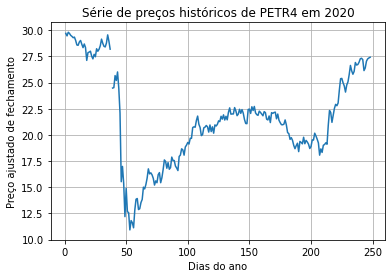

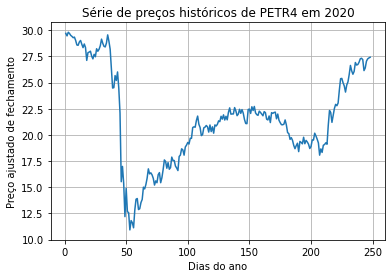

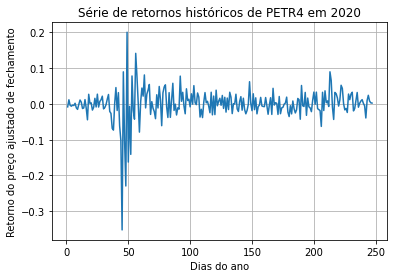

O valor médio do preço da ação PETR4 entre 01/01/2020 e 31/12/2020 é:  21.58082818346774
A volatilidade histórica dos dados de PETR4 de 01/01/2020 a 31/12/2020 é:  0.04482183547786385


In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#Importando o data-set a partir do arquivo CSV baixado do Yahoo Finance
PETR4data = pd.read_csv("./PETR4.SA2020.csv")

#Renomeando colunas para português
PETR4data.columns = ['Data','Preço abertura','Máximo','Mínimo','Preço fechamento','Preço ajustado','Volume']

print(PETR4data.loc[:,"Preço ajustado"])

#Apresentando o preço adjustado na forma de uma série temporal
x = range(1,249)
plt.plot(x,PETR4data.loc[:,"Preço ajustado"])

plt.xlabel('Dias do ano')
plt.ylabel('Preço ajustado de fechamento')
plt.title('Série de preços históricos de PETR4 em 2020')
plt.grid(True)
plt.show()

#Corrigindo a falta de um dado (o salto no gráfico). Isso é importante pra não atraplhar a análise dos dados.
PETR4data[PETR4data['Preço ajustado'].isnull()].index.tolist()
PETR4data.loc[37,"Preço ajustado"] = (PETR4data.loc[36,"Preço ajustado"] + PETR4data.loc[38,"Preço ajustado"])/2

#Plotando o gráfico novamente
x = range(1,249)
plt.plot(x,PETR4data.loc[:,"Preço ajustado"])

plt.xlabel('Dias do ano')
plt.ylabel('Preço ajustado de fechamento')
plt.title('Série de preços históricos de PETR4 em 2020')
plt.grid(True)
plt.show()

#Calculando o retorno dos preços da coluna "Preço ajustado"
precos = PETR4data["Preço ajustado"].tolist()

loglist = [math.log(precos[1]) - math.log(precos[0])]
for i in range(2,len(precos)):
    loglist.append(math.log(precos[i]) - math.log(precos[i-1]))
    
#Plotando o gráfico dos retornos
x = range(1,248)
plt.plot(x,loglist)

plt.xlabel('Dias do ano')
plt.ylabel('Retorno do preço ajustado de fechamento')
plt.title('Série de retornos históricos de PETR4 em 2020')
plt.grid(True)
plt.show()

#Calculando a média e o desvio padrao dos retornos
media = PETR4data['Preço ajustado'].mean()
vol = np.std(loglist)

#Printando os resultados
print("O valor médio do preço da ação PETR4 entre 01/01/2020 e 31/12/2020 é: ", media)
print("A volatilidade histórica dos dados de PETR4 de 01/01/2020 a 31/12/2020 é: ", vol)

Alguns comentários importantes sobre os cálculos que acabamos de fazer. Primeiro de tudo importamos os dados usando pandas, renomeamos as colunas para o português (pra ficar coerente com o idioma de todo o texto) e plotamos um gráfico do preço ajustado em função do tempo (o primeiro ponto corresponde à 01/01/2020 e o último à 31/12/2021). Note que essa série histórica tinha um buraco, devido a um dado faltante. Para corrigir isso estimamos que esse dado faltante é igual à média dos dados imediatamenet antes e imediatamente depois. Essa estimativa é uma forma de "ligar" os pontos, produzindo uma estimativa boa para o dado, o que é bem melhor do que não fazer nada, apagá-los da base de dados ou então colocar um outro valor arbitrário qualquer. Para um conjunto de dados relativamente grande, poderíamos eliminá-lo sem muito prejuízo para nossa estatística, mas para um conjunto pequeno é importante saber fazermos uma boa estimativa desse ponto. Depois disso, plotamos o gráfico novamente para confirmar que o dado foi corrigido e calculamos a média dos preços e a volatilidade usando os métodos de média e desvio padrão da bilbioteca Pandas, os quais produzem os mesmos resultados que as equações da seção 4.1.

Um segundo ponto importante é sobre o comportamento do gráfico: há duas quedas muito bruscas próximos dos dia 40 e 50, que correspondem exatamente às datas de 27/02/2020 e 09/03/2020 que marcam, precisamente, o início da pandemia de Covid-19 no Brasil e o começo das notícias sobre os casos, respectivamente. Após essa grande queda nos dados, eles voltam a crescer, chegando ao final do ano num patamar parecido (cerca de 10% mais baixo) do que no início do ano. Essa grande variação nos preços também aparece nos retornos, os quais são os maiores nesse mesmo período (maior oscilação no terceiro gráfico). Repare que a volatilidade em termos percentuais foi relativamente baixa $\sigma = 4.4$ %. Isso acontece, principalmente, porque as variações aconteceram nos dois sentidos (queda e aumento nos preços), de certa forma "cancelando" as variações muito extremas, refletindo numa volatilidade mais baixa. Nesse caso pode ser útil analisar períodos de tempo diferentes, como mensais ou dados históricos de maior período (2, 5, 10 anos). Para fins de coerência com esse texto prosseguiremos a partir disso. E pra encerrar essa estimativa de volatilidade histórica (o que, coincidentemente, escolhemos dados um pouco patológicos) vamos calcular o preço de uma opção de compra de $K = 27.50$, com uma taxa de juros de $r = 0.02$ (a taxa Selic ao final de 2020), há 15 dias do vencimento $T-t = 15/252$ e com a volatilidade calculada antes $\sigma = 0.0448$. Retornando ao código da seção 1 encontramos o que se mostra a seguir, o preço da opção de compra ficaria em $V_c = 0.13$, o que faz um certo sentido uma opção de preço de exercício igual ao preço da ação subjacente custando alguns centavos. Com esse exemplo fica bem claro a necessidade de se fazer boas estimativas de volatilidade. A estimativa de volatilidade histórica pode ser bastante útil, mas para isso devemos ter especial preocupação no período considerado e se houve a ocorrência de algum evento extremo (como a pandemia de Covid-19 e circuit breakers na Bolsa de Valores) durante esse período. 
Veremos a seguir como fazer uma estimativa mais "empírica" para a volatilidade, baseada em dados em tempo real: a volatilidade implícita.

In [3]:
#Importar as bibliotecas que serão utilizadas
import math
from scipy.stats import norm

#Calcular parâmetros d1 e d2 com os valores de S, K, r, sigma, T e t dados
S = 27.5 #Preço da ação subjacente
K = 27.5 #Preço de exercício
r = 0.02 #Taxa de juros livre de risco
sigma = 0.0448  #Volatilidade da ação subjacente
T = 16/251 #Dia de vencimento, contado como uma fração de dias úteis, são 251 dias úteis num ano
t = 1/251 #Dia onde a opção será calculada

d1 = (math.log(S/K) + (r+sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
d2 = (math.log(S/K) + (r-sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))

Vc = S*norm.cdf(d1) - K*math.exp(-r*(T-t))*norm.cdf(d2)
Ve = K*math.exp(-r*(T-t))*norm.cdf(-d2) - S*norm.cdf(-d1)

print('O preço de uma opção de compra de preço de exercício', K, 'com preço da ação subjacente', S,'será:', Vc)
print('O preço de uma opção de venda de preço de exercício', K, 'com preço da ação subjacente', S,'será:', Ve)

O preço de uma opção de compra de preço de exercício 27.5 com preço da ação subjacente 27.5 será: 0.13721805192997039
O preço de uma opção de venda de preço de exercício 27.5 com preço da ação subjacente 27.5 será: 0.10436916075553704


### 4.2) Volatilidade implícita

Essa é uma segunda forma de se estimar a volatilidade de uma opção que é baseada no cálculo da mesma através dos dados em tempo real de negociações de opções. Para uma dada opção de nossa escolha, supomos as opções de Petrobrás sobre a ação PETR4, temos disponível a mercado as informações de preço da ação subjacente, preço de exercício, taxa de juros livre de risco, tempo até o vencimento e **preço da opção**. A única variável desconhecida nesse contexto é a volatilidade. Então podemos usar os próprios dados do mercado, inclusive o preço das opções que estão sendo negociadas, e computar a volatilidade a partir desses dados. A esse tipo de cálculo damos o nome de volatilidade implícita. Retornando à equação BSM, para $\sigma$ desconhecido e $V_c$ conhecido teremos a seguinte equação

\begin{equation} V_c = SN\left(\frac{\ln{\left(\frac{S}{K}\right)} + \left(r + \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\right) - e^{-r(T-t)}N\left(\frac{\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\right) \label{eq:implicita} \tag{8} \end{equation}

note que agora a ideia é calcular $\sigma$ e não mais $V_c$, pois o preço da opção de compra é conhecido. Esse processo de se "inverter" a equação de BSM para achar a volatilidade é o que chamamos de volatilidade implícita, como comentado anteriormente. Para esse cálculo ficar mais fiel ao real repetimos esse processo para todas as opções de mesma data de vencimento e com preços de exercício semelhantes, permitindo-nos estimar uma volatilidade implícita para alguma opção de interesse com um dado preço de exercício. A maior dificuldade aqui, na verdade, é como resolver a equação \ref{eq:implicita}. A função distribuição acumulada normal padrão $N(x)$ pode ser expressa da seguinte forma

\begin{equation} N(x) = \frac{1}{2}\left(1 + \mbox{erf}\left(\frac{x}{\sqrt{2}}\right)\right), \tag{9} \end{equation}

onde $\mbox{erf}$ é a função erro de Gauss

\begin{equation} \mbox{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt. \tag{10} \end{equation}

Com isso vemos que o processo é um pouco mais complicado do que parece à primeira vista: precisamos inverter uma equação, cuja variável aparece dentro de uma integral não-elementar! Esse procedimento de inversão não pode ser feito pelas vias usuais, como fazemos com equações simples em cursos de matemática básica. Essa inversão pode ser feita através de algum método numérico ou até mesmo por tentativa e erro. Este último consistiria em chutar valores de $\sigma$ na solução da equação de BSM até encontrarmos um valor próximo para o preço da opção daquele que é praticado no mercado. É um método que daria bons resultados, mas muito genérico e arbitrário para funcionar no caso geral. Uma outra alternativa é usar um método iterativo, chamado de algoritmo de Newton-Raphson. Esse algoritmo permite resolver equações complicadas (como é o caso dessa) e encontrar uma solução numérica para um parâmetro escolhido. É exatamente o que precisamos: encontrar uma aproximação numérica para o cálculo da volatilidade implícita. Antes de continuar faremos uma breve digressão sobre o método de Newton-Raphson.

### Digressão: método de Newton-Raphson

Suponha que queiramos resolver a seguinte equação de uma variável $f(x) = 0$, que consiste em achar as raízes de $f(x)$. Supomos ainda que essa função $f(x)$ seja diferenciável. Para um chute inicial $x_0$ pra essa função calculamos um novo valor de $x$ mais bem aproximado, chamado $x_1$, da seguinte forma:

\begin{equation} x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}, \tag{11} \end{equation}

sendo $f'(x_0)$ a derivada de $f(x)$ calculada em $x_0$. Após encontrarmos o valor $x_1$ podemos reinseri-lo no mesmo algoritmo para calcular uma aproximação $x_2$ e assim sucessivamente. Repetimos o método quantas vezes forem necessárias até a precisão desejada. Portanto, de forma geral, a n-ésima solução para a equação $f(x) = 0$ é dada por

\begin{equation} x_n = x_n-1 - \frac{f(x_{n-1})}{f'(x_{n-1})}. \tag{12} \end{equation}

A essência desse método se baseia em utilizar-mos de aproximações lineares para a função $f(x)$ de forma a "caminhar" na direção da solução. Para funções cuja derivada existe e é bem comportada (esse é o caso do modelo BSM) esse método produz boas aproximações e uma boa velocidade de convergência.

### Fim da digressão.

Mas, tudo bem. E o que esse método tem a ver com a equação que queremos resolver? Simples podemos reescrever a equação (8) da seguinte forma:

\begin{equation} SN\left(\frac{\ln{\left(\frac{S}{K}\right)} + \left(r + \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\right) - e^{-r(T-t)}N\left(\frac{\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}\right) - V_c = 0, \tag{13} \end{equation}

portanto, para aplicarmos o método de Newton-Raphson, basta chamarmos todo o termo a esquerda de uma função $f(x)$, ou melhor, $f(\sigma)$ pois é $\sigma$ a variável de interesse. Essa função é avaliada para um valor inicial de teste $\sigma_0$ para a volatilidade e o algoritmo prossegue até encontrar uma raiz adequada para essa equação, que será a solução para o nosso problema. O próximo passo consiste em calcular a derivada de $f(\sigma)$ e, a seguir, implementar o algoritmo em Python. Vamos por partes. É importante perceber que a variável $\sigma$ aparece dentro da distribuição acumulada normal padrão, portanto o primeiro passo é descobrir como fazer esse cálculo. Com ajuda do Google encontramos que:

\begin{equation} N'(x) = \frac{1}{\sqrt{2 \pi }}e^{-\frac{x^2}{2}}. \tag{14} \end{equation}

Esse resultado é fácil de ser demonstrado usando a regra de Leibniz na função erro. Lembremos que precisamos calcular a derivada de $N(d1)$, onde $d_1$ depende de $\sigma$, logo precisamos aplicar uma regra da cadeia, ficando com

\begin{align} \frac{dN(d_1)}{d\sigma} &= N'(d_1)d_1' = \frac{1}{\sqrt{2 \pi }}e^{-\frac{d_1^2}{2}}d_1' \\
&= \frac{\left(\frac{\log \left(\frac{S}{k}\right)+\left(r+\frac{\text{sigma}^2}{2}\right) (T-t)}{\sqrt{2} \text{sigma}^2 \sqrt{T-t}}-\frac{\sqrt{T-t}}{\sqrt{2}}\right) \exp \left(-\frac{\left(\log \left(\frac{S}{k}\right)+\left(r+\frac{\text{sigma}^2}{2}\right) (T-t)\right)^2}{2 \text{sigma}^2 (T-t)}\right)}{\sqrt{\pi }} \\
&= \frac{1}{\sqrt{2\pi}}\left(\frac{d_1}{\sigma} - \sqrt{T-t}\right)e^{-d_1^2/2}, \tag{15}  \end{align}

e o mesmo vale para $d_2$. Logo combinando esses resultados podemos reescrever a função $f(\sigma)$ e sua derivada de uma forma mais compacta

\begin{align} f(\sigma) &= SN(d_1) - Ke^{-r(T-t)}N(d_2), \tag{16} \\ 
f'(\sigma) &= S\frac{1}{\sqrt{2\pi}}\left(\frac{d_1}{\sigma} - \sqrt{T-t}\right)e^{-d_1^2/2} - Ke^{-r(T-t)}\frac{1}{\sqrt{2\pi}}\left(\frac{d_2}{\sigma} - \sqrt{T-t}\right)e^{-d_2^2/2}, \tag{17} \end{align}

e portanto a solução para o problema da volatilidade implítica usando o algoritmo de Newton-Raphson será:

\begin{equation} \sigma_n = \sigma_{n-1} - \frac{f\left(\sigma_{n-1}\right)}{f'\left(\sigma_{n-1}\right)}. \tag{18} \end{equation}

Pode parecer complicado mas escrever as coisas dessa forma vai facilitar bastante a implementação que faremos a seguir. Então, como sempre, precisamos tomar os dados a mercado. Consultando novamente o site ADVFN para as opções de PETR4 mais negociadas: https://br.advfn.com/investimentos/opcoes/call-mais-negociada-petrobras (acessado em 08 de maio de 2021) vemos que a opção de compra mais negociada tem preço de exercício $K = 23.21$, com data de vencimento daqui a 14 dias e custando $V_c = 1.58$. A taxa de juros livre de risco já mencionamos, $r = 0.035$ e a ação subjacente PETR4 tem preço de $S = 24.38$. Falta, portanto, estimarmos a volatilidade a partir desses dados. Para não nos perdermos nesse algoritmo apresento a seguir uma lista de passos e logo depois dela o algoritmo já escrito.

I) Dar as definições iniciais de $S$, $K$, $r$ e $T-t$;

II) Escolher o chute inicial $\sigma_0$ da volatilidade;

III) Computar $f(\sigma)$ e $f'(\sigma)$ (usando funções para organizar melhor o código);

IV) Calcular a aproximação $\sigma_1$ a partir de $\sigma_0$;

V) Testar se o valor de $\sigma_1$ é uma boa aproximação pra raiz da função (basta avaliar a função nesse ponto);

VI) Iterar os procedimentos II) a V) até a precisão desejada ou até um número de iterações pré-estabelecido.

In [9]:
#Importando as bibliotecas necessárias
import math

#Criando as funções a serem utilizadas paro deixar o código mais organizado
def funcaosigma(precoacao,strike,taxa,vol,tempo,opcaopreco):
    Vc = opcaopreco
    S = precoacao
    K = strike
    r = taxa
    sigma = vol
    t = tempo
    d1 = (math.log(S/K) + (r+sigma**2/2)*(t))/(sigma*math.sqrt(t))
    d2 = (math.log(S/K) + (r-sigma**2/2)*(t))/(sigma*math.sqrt(t))
    return S*norm.cdf(d1) - K*math.exp(-r*(t))*norm.cdf(d2) - Vc

def derivadasigma(precoacao,strike,taxa,vol,tempo):
    S = precoacao
    K = strike
    r = taxa
    sigma = vol
    t = tempo
    d1 = (math.log(S/K) + (r+sigma**2/2)*(t))/(sigma*math.sqrt(t))
    d2 = (math.log(S/K) + (r-sigma**2/2)*(t))/(sigma*math.sqrt(t))
    derivada = (S*(d1/sigma - math.sqrt(t))*math.exp(-d1**2/2))/(math.sqrt(2*math.pi)) - (K*math.exp(-r*t)*(d2/sigma - math.sqrt(t))*math.exp(-d2**2/2))/(math.sqrt(2*math.pi))
    return derivada

#Calculo da volatilidade implícita
Numiter = 10
Vc = 1.58
S = 24.38
K = 23.21
r = 0.035
sigma0 = 0.1
t = 14/252

sigma = sigma0 - funcaosigma(S,K,r,sigma0,t,Vc)/derivadasigma(S,K,r,sigma0,t) #Definindo o novo sigma para as iterações
for i in range(1,Numiter): #Realizando as iterações do método de Newton-Raphson
    sigma = sigma - funcaosigma(S,K,r,sigma,t,Vc)/derivadasigma(S,K,r,sigma,t)
    
print("A volatilidade implícita calculada é ", sigma, "com um total de iterações igual a ", Numiter)
print("O valor da opção de compra usando essa volatilidade é ", S*norm.cdf((math.log(S/K) + (r+sigma**2/2)*(t))/(sigma*math.sqrt(t))) - K*math.exp(-r*(t))*norm.cdf((math.log(S/K) + (r-sigma**2/2)*(t))/(sigma*math.sqrt(t))))


A volatilidade implícita calculada é  0.3740462912148839 com um total de iterações igual a  10
O valor da opção de compra usando essa volatilidade é  1.5800000000000018


Note que o método da volatilidade implícita produz bons resultados, com uma convergência bem rápida e uma precisão bem alta. Para utilizá-lo, basta alterar os valores do código acima para os valores da opção de compra, da ação, o preço de exercício, a taxa de juros e o tempo até o vencimento que o algoritmo se encarrega de fazer o resto. Além disso podemos melhorar esse resultado ainda mais. Esse cálculo foi feito apenas com uma opção de compra. Podemos repetir esse cálculo para várias opções de compra de preços de exercícios próximos e mesma data de vencimento e calcular várias volatilidade implícitas em cada um desses casos. A volatilidade final da opção que queremos precificar será a média dessas volatilidades implícitas. Esse tipo de cálculo é mais fiel, de certa forma, do que método de volatilidade histórica pois, de certa forma, captura a volatilidade instantânea, atual, que os dados apresentam. Esse método é geralmente usado para se precificar outras opções de interesse através de dados obtidos do mercado com opções já de preço conhecido.

## 5) Opções mais complicadas, ações que pagam dividendos

### 5.1) Opções Americanas

Apesar de termos feito vários testes com forte apelo prático nem todas opções disponíveis serão tão simples quanto às que tratamos nas seções anteriores. Por exemplo nos restringimos apenas a opções Europeias sobre ações que não pagam dividendos. Nessa seção aliviaremos essas restrições para analisar opções mais reais e expandir nossos conhecimentos sobre o modelo de Black-Scholes-Merton para precificação de opções.

A primeira restrição que queremos reavaliar é sobre opções Europeias. Muitas opções do mundo real, especialmente no Brasil, são Americanas, ou seja, podem ser exercidas em qualquer tempo $t < T$. Precificar opções Americanas, no contexto do modelo de Black-Scholes-Merton é mais difícil e nenhuma solução fechada (como a equação (2), por exemplo) é conhecida para esse caso. Isso acontece porque o fato da opção poder ser exercida antes afeta o preço da mesma, criando-se estratégias de exercimento antecipado da opção. Porém, algumas considerações podem ser feitas:

I) A ação subjacente **não paga dividendos**: Nesse caso, é conhecido que exercer a opção antes da data do vencimento não é uma estratégia ótima, logo o preço ótimo pago para uma opção Americana é o mesmo de uma opção Europeia, dado que somente é ótimo exercer uma opção Americana exatamente na data de vencimento, $t = T$.

II) A ação subjacente **paga dividendos**: Supomos que a ação paga apenas UM dividendo durante o período de realização do contrato da opção. Nesse caso é possível provar que é ótimo exercer opção Americana exatamente após de se receber o dividendo. Para mais detalhes sobre essa forma de precificação, recomendamos as referências [6,7]. Para sabermos se exercer a opção antes do vencimento é ótimo, considere que a ação subjacente pague um dividendo $Q$ durante o tempo de validade da opção e considere a seguinte inequação [8]:

\begin{equation} Q \leq K\left(1-e^{-r(T-t_1)}\right), \tag{19} \end{equation}

em que $Q$ é a taxa de dividendo paga, $r$ é a taxa de juros livre de risco, $T$ é o prazo de vencimento da opção e $t_1$ é o período em que a ação pagou o seu único dividendo. Se a inequação for satisfeita (isto é, $Q$ for menor do que o lado direito da inequação), não é ótimo exercer a opção Americana antes da data de exercício. Caso ela não seja satisfeita, então será uma estratégia ótima exercer a opção Americana antecipadamente. Nesse segundo caso é possível se precificar a opção Americana usando uma expressão bem mais complicada que a equação (2). O resultado pdoe ser encontrado nas referências [6,7].

### 5.2) Opções sobre ações que pagam dividendos

Porém, a questão que fica é: como precificar uma opção sobre uma ação que paga dividendos? Usamos esse fato na seção anterior para discutir as opções Americanas porém não discutimos com mais detalhes a forma de se precificar opções sobre ações que pagam dividendos. Essa ideia já estava prevista no modelo original de Black-Scholes, aprimorado por Merton [3], e a expressão é relativamente simples [4]. Se uma ação subjacente paga uma taxa de dividendos $q$ as equações (2) e (3) podem ser modificadas facilmente para se incluir o fator $q$:

\begin{equation} V_C(Se^{-q(T-t)},t) = Se^{-q(T-t)}N(d_1) - Ke^{-r(T-t)}N(d_2), \tag{20} \end{equation}

em que $d_1$ e $d_2$ da equação (3) são dados por:

\begin{equation} d_1 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r - q + \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}, \qquad d_2 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r - q - \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}. \tag{21} \end{equation}

### 5.3) Opções sobre futuros

De forma análoga ao caso para ações que pagam dividendos é possível se precificar opções sobre futuros de índice. Suponha que o preço futuro do contrato seja $F$ com prazo para vencimento $T$. Esse preço futuro pode ser relacionado ao preço do ativo subjacente da seguinte forma $F = Se^{(r-q)(T-t)}$, sendo $q$ o valor anual do dividendo pago pelo índice durante o tempo de maturidade da opção. Com essas modificações as equações (2) e (3) para se precificar opções sobre futuros de índices serão:

\begin{equation} V_C(F,t) = Fe^{-r(T-t)}N(d_1) - Ke^{-r(T-t)}N(d_2), \tag{22} \end{equation}

\begin{equation} d_1 = \frac{\ln{\left(\frac{F}{K}\right)} + \frac{\sigma^2}{2}\left(T-t\right)}{\sigma\sqrt{T-t}}, \qquad d_2 = \frac{\ln{\left(\frac{F}{K}\right)} - \frac{\sigma^2}{2}\left(T-t\right)}{\sigma\sqrt{T-t}}.  \tag{23} \end{equation}

### 5.4) Opções sobre moeda

Finalmente o último caso a ser tratado é para opções sobre moeda. Nesse caso consideramos $S$ como sendo o preço de uma unidade da moeda cotada em dólares americanas. Esse caso também é análogo a uma opção sobre ação que paga dividendos com $q$ sendo substituído pela taxa de juros livre de risco na moeda estrangeira, $r_f$. Nesse caso a expressão para uma opção de compra será:

\begin{equation} V_C(F,t) = Se^{-r_f(T-t)}N(d_1) - Ke^{-r(T-t)}N(d_2), \tag{24} \end{equation}

\begin{equation} d_1 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r - r_f + \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}, \qquad d_2 = \frac{\ln{\left(\frac{S}{K}\right)} + \left(r - r_f - \frac{\sigma^2}{2}\right)\left(T-t\right)}{\sigma\sqrt{T-t}}. \tag{25} \end{equation}

## 6) Paridade Put-Call

Essa é uma propriedade importante entre opções de venda (put options, em inglês) e opções de compra (call options, em inglês) que nos permite relacionar o preço de opções de venda e opções de compra Europeias que possuem o mesmo preço de exercício e tempo até o vencimento. Essa é uma propriedade mais geral do que o modelo BSM e pode ser usado para se calcular o preço de opções de venda a partir de opções de compra ou vice-versa. Ela também tem um apelo prático muito forte: é possível criar estratégias sintéticas que mimetizam operações de opções de venda usando opções de compra ou vice-versa. No mercado brasileiro isso esse tipo de estratégia é especialmente importante pois opções de venda possuem baixa liquidez.

Para se derivar essa relação importante consideremos dois portfólios [4]:

**Portfólio A:** Uma opção Europeia de compra mais um ativo livre de risco que produz um pagamento exatamente igual a K no tempo T.

**Portfólio B:** Uma opção Europeia de venda mais uma ação.

No tempo de maturidade $T$ ambos portfólios satisfazem: payoff $S_T$ no caso $S_T > K$ e payoff $K$ no caso $S_T < K$. Ou seja, ambos portfólios tem o mesmo payoff data de vencimento da opção. Como as opções são Europeias não podem ser exercidas antes do vencimento. Além disso, a igualdade dos portfólios, demonstrada ser válida para $t = T$ também deverá valer quando $t < T$, para que não haja oportunidades de arbitragem. Num tempo $t <T$ o portfólio $A$ custará $V_C + Ke^{-r(T-t)}$ e o portfólio B custará $V_E + S$ (o valor das opções, o ativo livre de risco descontado e a ação). Como é válido que ambos pagamentos serão iguais em qualquer tempo $t$ temos que vale a igualdade:

\begin{equation} V_C + Ke^{-r(T-t)} = V_E + S. \tag{26} \end{equation}

Essa equação é conhecida como paridade put-call. Ela permite relacionar o preço entre opções de venda e opções de compra Europeias sobre ações que não pagam dividendos que possuem o mesmo preço de exercício e mesma data de vencimento. Note que essa relação é independente de qualquer modelo sobre como se precifica $V_C$ ou $V_E$. Inclusive pode-se usar essa relação para opções do mundo real (cujos preços são tomados a mercado e com taxas de juros livre de risco do mercado de interesse).

## 7) As gregas

Falta pouco para encerrarmos nossa discussão sobre o modelo de Black-Scholes-Merton. A última característica importância pra explorarmos são as **gregas**. As gregas estão associadas com uma questão muito importante tanto em opções quanto em mercados derivativos em geral: o gerenciamento de risco. É possível medir várias dimensões do risco em opções através da ideia de gregas e através das informações delas podermos tomar decisões sobre operações com opções, criar estratégias sintéticas ou estratégias de hedge. Uma grega em particular analisa a variação do preço da opção em relação a um parâmetro específico ao mesmo tempo que se mantêm todos os outros parâmetros fixos. Isso é importante de se estar em mente quando formos analisá-las logo a seguir.  Veremos em detalhes a partir de agora as gregas mais usadas.

### 7.1) Delta $(\Delta)$

Definimos a grega Delta, $\Delta$, como sendo a variação do preço da opção (seja $V_C$ pra opção de compra, seja $V_E$ pra opção de venda) em relação ao preço da ação subjacente. Em termos matemáticos essa grega é dada pela derivada do preço da opção, chamada de $V$, em relação ao preço do ativo subjacente, chamado de $S$:

\begin{equation} \Delta = \frac{\partial V}{\partial S}. \tag{27} \end{equation}

Um Delta grande significa que o preço da opção varia muito quando $S$ varia, mesmo se a variação em $S$ for pequena. Imagine $\Delta = 0.6$ significa que o preço da opção varia em $60$ % quando $S$ varia de uma pequena quantidade. Essa grega serve como uma forma de se medir o risco da opção frente o preço do ativo subjacente. Se o ativo subjacente tiver uma influência muito forte no preço da opção (seja aumentando, seja diminuindo) o $\Delta$ será grande. É possível construir estratégias de negociação de opções que chamamos de delta neutral hedging, nas quais queremos construir uma carteira de opções e ações cujo Delta seja nulo (ou o menor possível). Elas são pensadas pra se zerar o erro Delta (ou minimizá-lo) e é a partir de um princípio desses que a equação de Black-Scholes-Merton foi originalmente demonstrado. Para mais detalhes sobre esse ponto sugerimos [4].

Como a expressão para $V$ é conhecida no modelo BSM podemos expressar $\Delta$ explicitamente no caso de opções de compra Europeias sobre ações que não pagam dividendos derivando a equação (2). O resultado é:

\begin{equation} \Delta = N(d_1), \tag{28} \end{equation}

o resultado para opções de venda Europeias sobre ações que não pagam dividendos é análogo. Por fim, considere um portfólio de opções $\Pi$ com $N$ opções, cada uma delas com um peso $w_i$ e grega Delta dada por $\Delta_i$. O Delta do portfólio todo é a soma ponderada dos Deltas de cada opção:

\begin{equation} \Delta_{\Pi} = \sum_{i=0}^N w_i\Delta_i. \tag{29} \end{equation}

### 7.2) Theta $(\Theta)$

A grega Theta, $\Theta$, é definida como a variação do preço da opção em relação ao tempo até o vencimento. Para simplificar supomos que o tempo onde a grega é precificada, $t$, é um tempo inicial arbitrário $t = 0$, logo a grega Theta será dada por:

\begin{equation} \Theta = \frac{\partial V}{\partial T}, \end{equation}

sendo $V$ o preço da opção e $T$ o tempo até o vencimento da mesma. Essa grega está associada à ideia da variação do preço à medida que a data de vencimento da opção se aproxima. Quanto maior essa grega, maior é a perda de valor da opção à medida que o tempo passa. Falamos sobre perda de valor pois a grega Theta é sempre negativa: a opção diminui por um percentual $\Theta$ quando o tempo $T$ varia em pequenos valores. Para o caso das opções de compra Europeias sobre ações que não pagam dividendos, usando o modelo BSM temos

\begin{equation} \Theta = -\frac{S\sigma\, e^{-d_1^2/2}}{2\sqrt{2\pi T}} - rKe^{-rT}N(d_2), \tag{30} \end{equation}

como podemos ver a expressão acima, todos os termos são positivos, logo $\Theta$ será negativa.

### 7.3) Gamma $(\Gamma)$

A grega Gamma, $\Gamma$, é definida como a variação da delta em relação ao preço do ativo subjacente. Em termos matemáticos:

\begin{equation} \Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}, \tag{31} \end{equation}

sendo $V$ o preço da opção e $S$ o preço do ativo subjacente. Essa grega mede o quanto o Delta varia em relação ao preço do ativo subjacente. Essa informação é importante na gestão de carteiras, principalmente em estratégias de delta hedging. Se o Gamma de uma opção é muito grande (tanto negativo quanto positivo) significa que o Delta dessa opção é muito sensível à variações de $S$, o que influencia no processo de hedge. Nesse caso, onde Gamma é muito grande, a estratégia de hedge para se zerar o delta tem que ser calibrada frequentemente, pois quando $S$ muda, Delta influencia no valor da ação e Gamma influencia no valor de Delta. Para opções de compra Europeias sobre ações que não pagam dividendos temos o Gamma dado por

\begin{equation} \Gamma = \frac{e^{-d_1^2/2}}{S\sigma\sqrt{2\pi T}}. \tag{32} \end{equation}

Gamma para opções de venda é idêntico à equação acima.

### 7.4) Vega $(\nu)$

A grega Vega, $\nu$, é definida como a variação do preço da opção de em relação à volatilidade:

\begin{equation} \nu = \frac{\partial V}{\partial \sigma}. \tag{33} \end{equation}

Essa grega mede o quanto o preço da opção varia quando a volatilidade varia por pequenos valores. Uma vega muito grande significa que o preço da opção é muito sensível à variações da volatilidade. Para uma opção de compra Europeia sobre ações que não pagam dividendos o vega é dado por

\begin{equation} \nu = \frac{S\sqrt{T}e^{-d_1^2/2}}{\sqrt{2\pi}}. \tag{34} \end{equation}

### 7.5) Rho $(\rho)$

A grega Rho, $\rho$, é definida como a variação do preço da opção em relação à taxa de juros livre de risco. Em termos matemáticos:

\begin{equation} \rho = \frac{\partial V}{\partial r}, \tag{35} \end{equation}

essa grega mede o quanto o preço da opção varia quando se varia a taxa de juros livre de risco. Essa grega, apesar de importante, é uma das menos usadas pois a taxa de juros livre de risco geralmente é tida com constante e mantida fixa nos modelos de precificação. Essa questão ficará importante, no caso brasileiro, às vesperas da reunião do COPOM (onde são decididas as taxas de juros) e também em situações de alta insegurança mesmo para ativos de baixo risco (afetando as taxas de juros livre de risco). Para o caso de opções de compra Europeias sobre ações que não pagam dividendos temos a seguinte expressão

\begin{equation} \rho = KTe^{-rT}N(d_2), \tag{36} \end{equation}

a expressão para opções de venda é análoga. 

### 7.6) Código para cálculo das gregas

A seguir apresentaremos um código em Python que implementa todas as gregas mencionadas acima, restringindo-nos ao modelo BSM e a precificação de opções Europeias sobre ações que não pagam dividendos (lembrando que as generalizações para outros tipos de opções e sobre outros tipos de ativos podemos encontrar na seção anterior). Primeiro calcularemos as gregas usando as expressões acima e compararemos o desempenho das mesmas para variações pequenas nos parâmetros das opções. Por exemplo, fixaremos todos os parâmetros e variaremos $S$ para computarmos se essa variação está de acordo com aquela prevista pela $\Delta$ e assim sucessivamente. Vamos ao código.

## 8) Generalizações do modelo de Black-Scholes-Merton (opcional)

## 9) Conclusões

## Bibliografia

[1] BLACK, Fisher; SCHOLES, Myron. The pricing and corporate liabilities. Journal of Political Economy, v. 81, 1973.

[2] MERTON, Robert C. On the pricing of corporate debt: The risk structure of interest rates. The Journal of finance, v. 29, n. 2, p. 449-470, 1974.

[3] MERTON, Robert C. Theory of rational option pricing. The Bell Journal of economics and management science, p. 141-183, 1973.

[4] HULL, John C. Opções, futuros e outros derivativos. Bookman Editora, 2016.

[5] RICHMOND, Peter; MIMKES, Jürgen; HUTZLER, Stefan. Econophysics and physical economics. Oxford University Press, 2013.

[6] WHALEY, Robert E. On the valuation of American call options on stocks with known dividends. Journal of Financial Economics, v. 9, n. 2, p. 207-211, 1981.

[7] GESKE, Robert; ROLL, Richard. On valuing American call options with the Black‐Scholes European formula. The Journal of Finance, v. 39, n. 2, p. 443-455, 1984.

[8] ROLL, Richard. An analytic valuation formula for unprotected American call options on stocks with known dividends. Journal of Financial Economics, v. 5, n. 2, p. 251-258, 1977.